# Tasca M5 T01

Exercicis d'Hipotesis Testing.

- Exercici 1:  
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 



- Exercici 2:  
Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.



- Exercici 3:  
Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.


La importació de les dades ha hagut de ser amb el punt i coma com a separador i amb un encoding diferent per un error que apareixia al llegir l'arxiu csv. No hem trobat nan's ni nulls. Hem identificat unes variables no numeriques que he filtrat més endavant.

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\WotanJr\Desktop\Data Science - IT Academy\Sprint 5\hipotesis_testing\Lligues europees UEFA.csv', 
                sep = ';', encoding = 'ISO-8859-1')
df

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,94,Bordeaux,FRA,20,37,5,13,19,48,89,...,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
94,95,Venezia,ITA,20,37,6,8,23,34,69,...,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
95,96,Watford,ENG,19,37,6,5,26,33,75,...,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster
96,97,Norwich City,ENG,20,37,5,7,25,23,79,...,22,0.59,33.0,73.3,-40.4,-1.09,L L L L D,26826,Teemu Pukki - 11,Tim Krul


In [2]:
df.shape

(98, 21)

In [3]:
df.dtypes

Rk                   int64
Squad               object
Country             object
LgRk                 int64
MP                   int64
W                    int64
D                    int64
L                    int64
GF                   int64
GA                   int64
GD                   int64
Pts                  int64
Pts/G              float64
xG                 float64
xGA                float64
xGD                float64
xGD/90             float64
Last 5              object
Attendance           int64
Top Team Scorer     object
Goalkeeper          object
dtype: object

In [4]:
df.isna().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [5]:
df.isnull().sum()

Rk                 0
Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [6]:
df.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,28.434134,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,49.500000,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,73.750000,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


## Exercici 1

**Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.**

Importarem la llibreria scipy.stats per utilitzar el test de Shapiro-Wilk. Aquest test assumeix que les observacions a cada mostra són independents i identicament distribuides. Tot amb l'objectiu d'avaluar (amb una alfa del 5%) el següent:

- Hipotesí nul·la (H0): que la variable en qüestió té probablement una distribució normal o gausiana.
- Hipotesi alternativa (H1): que la variable probablement no té una distribució normal o gausiana.

Aplicarem això a la variable GD, que és la diferencia de gols a favor i en contra.

stat=0.986, p=0.396
Goal difference is probably Gaussian


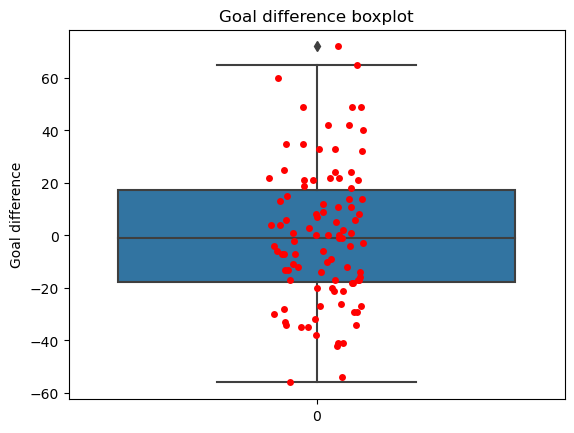

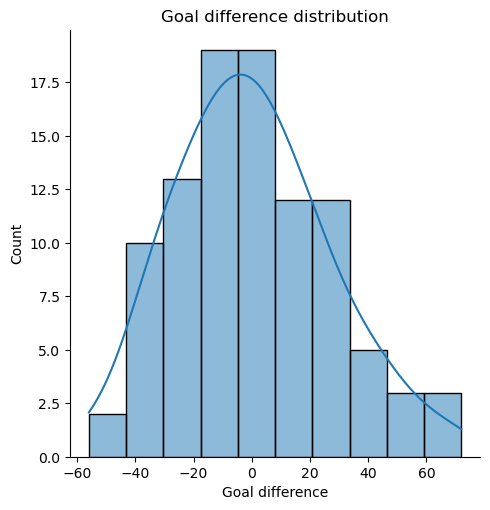

In [7]:
from scipy.stats import shapiro

data = df['GD']

stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Goal difference is probably Gaussian')
else:
    print('Goal difference is probably not Gaussian'. format(data))

# afegim gràfiques
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=data)
sns.stripplot(data=data, color='r')
plt.title('Goal difference boxplot', fontsize=12)
plt.ylabel('Goal difference',fontsize=10)

sns.displot(data=data, bins = 10, kde=True)
plt.title('Goal difference distribution', fontsize=12)
plt.xlabel('Goal difference',fontsize=10)
plt.show()

Aquest resultat ens mostra que el valor de p és bastant superior a 0.05 (és de 0.396). Això ve a dir que no hi ha indicis per rebutjar la hipotesi nul·la (H0), i que per tant la distribució de la diferencia de gols és gaussiana.  

A continuació es mostra un codi que primer filtra les varibles no numeriques, i classifica les variables numeriques en dues llistes: les que són probablement gaussianes i les que probablement no ho són. Val a dir que les variables Pts (punts) i Pts/G (punts per partit) cauen a la banda de no gaussianes amb una p de 0.035. Si hi hagués un canvi de criteri amb el valor d'alfa podrien caure en el costat de probablement gaussianes.

In [8]:
gaussians_list = []
not_gaussians_list = []

for i, (name, dtype) in enumerate(zip(df.columns, df.dtypes)):
    if dtype == 'int64' or dtype == 'float64':
        stat, p = shapiro(df[name])
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('{} is probably Gaussian'.format(name))
            gaussians_list.append(name)
        else:
            print('{} is probably not Gaussian'.format(name))
            not_gaussians_list.append(name)

print('\nLes següents variables són probablement gausianes: ', gaussians_list)
print('I les següents probablement no ho són: ', not_gaussians_list)

stat=0.955, p=0.002
Rk is probably not Gaussian
stat=0.952, p=0.001
LgRk is probably not Gaussian
stat=0.605, p=0.000
MP is probably not Gaussian
stat=0.965, p=0.011
W is probably not Gaussian
stat=0.977, p=0.081
D is probably Gaussian
stat=0.988, p=0.558
L is probably Gaussian
stat=0.943, p=0.000
GF is probably not Gaussian
stat=0.983, p=0.243
GA is probably Gaussian
stat=0.986, p=0.396
GD is probably Gaussian
stat=0.972, p=0.035
Pts is probably not Gaussian
stat=0.972, p=0.035
Pts/G is probably not Gaussian
stat=0.940, p=0.000
xG is probably not Gaussian
stat=0.989, p=0.610
xGA is probably Gaussian
stat=0.979, p=0.128
xGD is probably Gaussian
stat=0.978, p=0.096
xGD/90 is probably Gaussian
stat=0.907, p=0.000
Attendance is probably not Gaussian

Les següents variables són probablement gausianes:  ['D', 'L', 'GA', 'GD', 'xGA', 'xGD', 'xGD/90']
I les següents probablement no ho són:  ['Rk', 'LgRk', 'MP', 'W', 'GF', 'Pts', 'Pts/G', 'xG', 'Attendance']


## Exercici 2

**Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.**

Una manera de mirar la correlació entre les variables és amb el següent heatmap de coeficients de correlació de Pearson.

En aquest heatmap es pot observar com les correlacion són molt bones (tant directes com inverses). Té sentit que ho siguin, si fiques molts gols i encaixes pocs , sumes més punts i apareixes més amunt al ranking (i viceversa).  

Hi han dues excepcions, que són els empats (D) i partits jugats (MP), que és molt constant (el màxim és 37 i el mínim 34) i no depen d'altres variables, sinò del calendari de la UEFA.  

Hi ha un altre cas, que és Attendance (assistencia al camp) que té bastanta correlació amb la resta de variables, però no tanta com la resta de variables entre elles. Això pot ser degut a que als aficionats no els influeix tant que els equips vagin millor o pitjor.

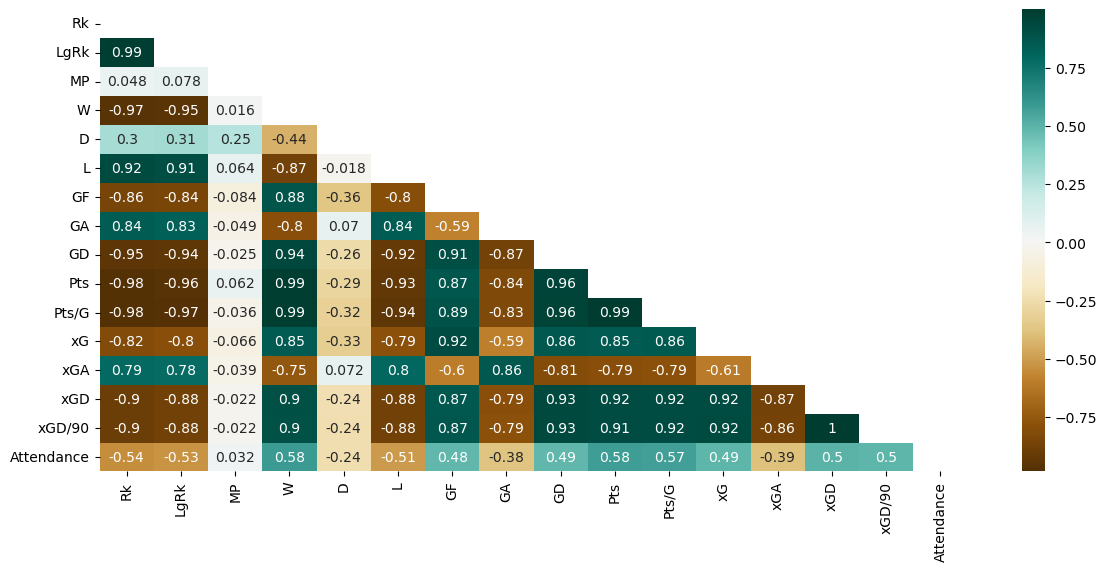

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14,6))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))  # filter the double output and the main diagonal
sns.heatmap(df.corr(), mask = mask, annot=True, cmap='BrBG')
plt.show()

Per fer-ho bé, importarem la llibreria scipy.stats per utilitzar el test pearsonr, tot amb l'objectiu d'avaluar (amb una alfa del 5%) si les variables són probablement dependents. Per avaluar això, utilitzarem el coeficient de correlació de Pearson, que comproba si dues mostres tenen una relació linial.

Aquest test assumeix el següent:

- Les observacions a cada mostra són independents i identicament distribuides.
- Les observacions de cada mostra tenen distribució normal.
- Les observacions de cada mostra tenen la mateixa variança.

Pel que fa a les hipotesis:

- Hipotesi nul·la (H0): les dues mostres són independents.
- Hipotesi alternativa (H1): Hi ha una dependencia entre mostres.

Utilitzarem aquest metode per avaluar la relació entre gols a favor (GF) i punts aconseguits (Pts).

stat=0.874, p=0.000
Probably dependent


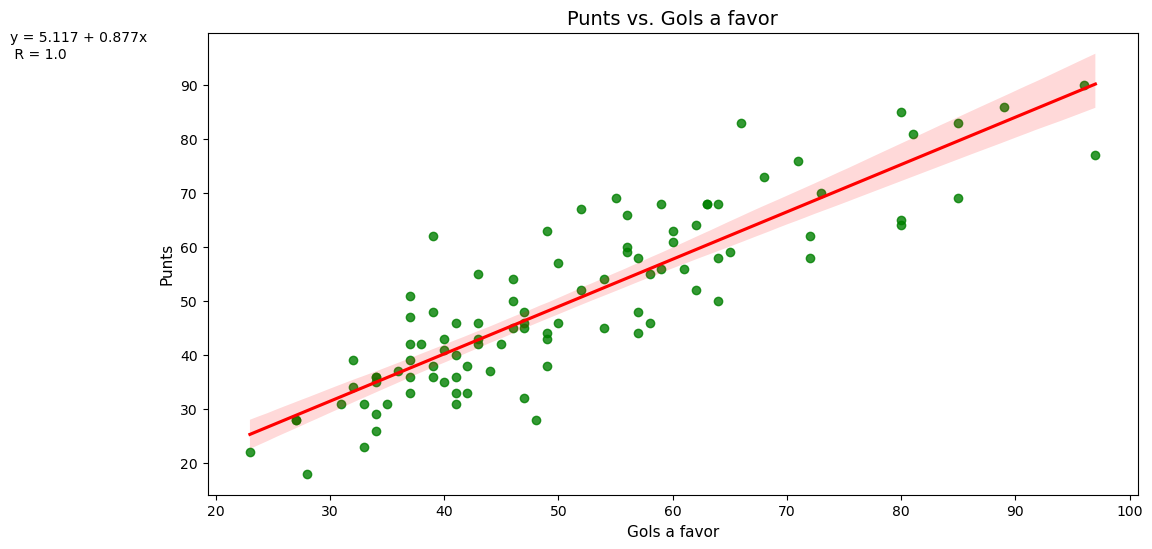

In [10]:
from scipy.stats import pearsonr
data1 = df['GF']
data2 = df['Pts']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

# afegim regression plot
plt.figure(figsize=(12,6))
g = sns.regplot(x=df['GF'], y=df['Pts'], color = 'g', line_kws = {"color": "red"})
plt.title('Punts vs. Gols a favor', fontsize=14)
plt.ylabel('Punts',fontsize=11)
plt.xlabel('Gols a favor',fontsize=11)

#afegim equació a la gràfica
import scipy
slope, intercept, r, p, sterr = scipy.stats.linregress(x=g.get_lines()[0].get_xdata(), y=g.get_lines()[0].get_ydata())
plt.text(2, 95, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x' + '\n R = ' + str(r))

plt.show()

S'observa com el valor de p és molt petit (0.000), molt per sota de 0.05 la qual cosa ens diu que podem rebutjar la hipotesi nul·la, i per tant les variables punts (Pts) i gols a favor (GF) són variables dependents. 

A continuació mostrem un codi que crea totes les combinacions possibles de 2 variables numeriques (sense repetir), i per cada combinació utilitza el test de Pearson per discernir si les 2 variables són o no són independents. També crea dues llistes, una amb les combinacions de variables probablement independents (que mostrarem) i una altra (que no mostrarem ja que en són moltes) amb les combinacions de variables probablement dependents.

In [11]:
from itertools import combinations

# Agafem columnes numeriques
df_num_columns = []
for i, (name, dtype) in enumerate(zip(df.columns, df.dtypes)):
    if dtype == 'int64' or dtype == 'float64':
        df_num_columns.append(name)

# # Totes les combinacions de 2 (ho tornen com a tuples)
comb = combinations(df_num_columns, 2)

from scipy.stats import pearsonr

independent_list = []
dependent_list = []

for i in list(comb):
    data1 = df[i[0]]
    data2 = df[i[1]]
    stat, p = pearsonr(data1, data2)
    # print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('stat=%.3f, p=%.3f' % (stat, p))
        print('{} and {} are probably independent'.format(i[0], i[1]))
        independent_list.append([i[0], i[1]])
    else:
      # print('{} and {} are probably dependent'.format(i[0], i[1]))
      dependent_list.append([i[0], i[1]])

stat=0.048, p=0.636
Rk and MP are probably independent
stat=0.078, p=0.447
LgRk and MP are probably independent
stat=0.016, p=0.873
MP and W are probably independent
stat=0.064, p=0.533
MP and L are probably independent
stat=-0.084, p=0.414
MP and GF are probably independent
stat=-0.049, p=0.629
MP and GA are probably independent
stat=-0.025, p=0.805
MP and GD are probably independent
stat=0.062, p=0.544
MP and Pts are probably independent
stat=-0.036, p=0.722
MP and Pts/G are probably independent
stat=-0.066, p=0.519
MP and xG are probably independent
stat=-0.039, p=0.700
MP and xGA are probably independent
stat=-0.022, p=0.833
MP and xGD are probably independent
stat=-0.022, p=0.830
MP and xGD/90 are probably independent
stat=0.032, p=0.753
MP and Attendance are probably independent
stat=-0.018, p=0.860
D and L are probably independent
stat=0.070, p=0.492
D and GA are probably independent
stat=0.072, p=0.480
D and xGA are probably independent


In [12]:
print('\nHi han', len(dependent_list), 'combinacions amb parells que són probablement dependents.')
print('A més a més, hi han ', len(independent_list), 'combinacions amb parells que són probablement independents, i les combinacions són:\n')
independent_list


Hi han 103 combinacions amb parells que són probablement dependents.
A més a més, hi han  17 combinacions amb parells que són probablement independents, i les combinacions són:



[['Rk', 'MP'],
 ['LgRk', 'MP'],
 ['MP', 'W'],
 ['MP', 'L'],
 ['MP', 'GF'],
 ['MP', 'GA'],
 ['MP', 'GD'],
 ['MP', 'Pts'],
 ['MP', 'Pts/G'],
 ['MP', 'xG'],
 ['MP', 'xGA'],
 ['MP', 'xGD'],
 ['MP', 'xGD/90'],
 ['MP', 'Attendance'],
 ['D', 'L'],
 ['D', 'GA'],
 ['D', 'xGA']]

Podem observar que en aquesta llista de parells de variables probablement independents hi trobem sovint MP (partits jugats) i D (empats), que ja haviem vist en el heatmap de coeficients de correlació que tenien poca correlació amb la resta de variables.

## Exercici 3

**Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.**

Seleccionem tres atributs que ja podem deduir que estaran molt relacionats: punts (Pts), gols a favor (GF) i posició (RK).  
Per aquest exercici utilitzarem el test de Friedman, que testeja si les distribucions de dues o més distribucions són iguals o no. Aquest test assumeix que:

- Les observacions a cada mostra són independents i identicament distribuides.
- Les observacions a cada mostra poden ser ordenades o classificades.
- Les observacions entre cada mostra són emparellades.

Pel que fa a les hipotesis: 

- Hipotesi nul·la (H0): les distribucions de totes les mostres són iguals.
- Hipotesi alternativa (H1): les distribucions d'una o més mostres no són iguals.






stat=0.782, p=0.676
Probably the same distribution


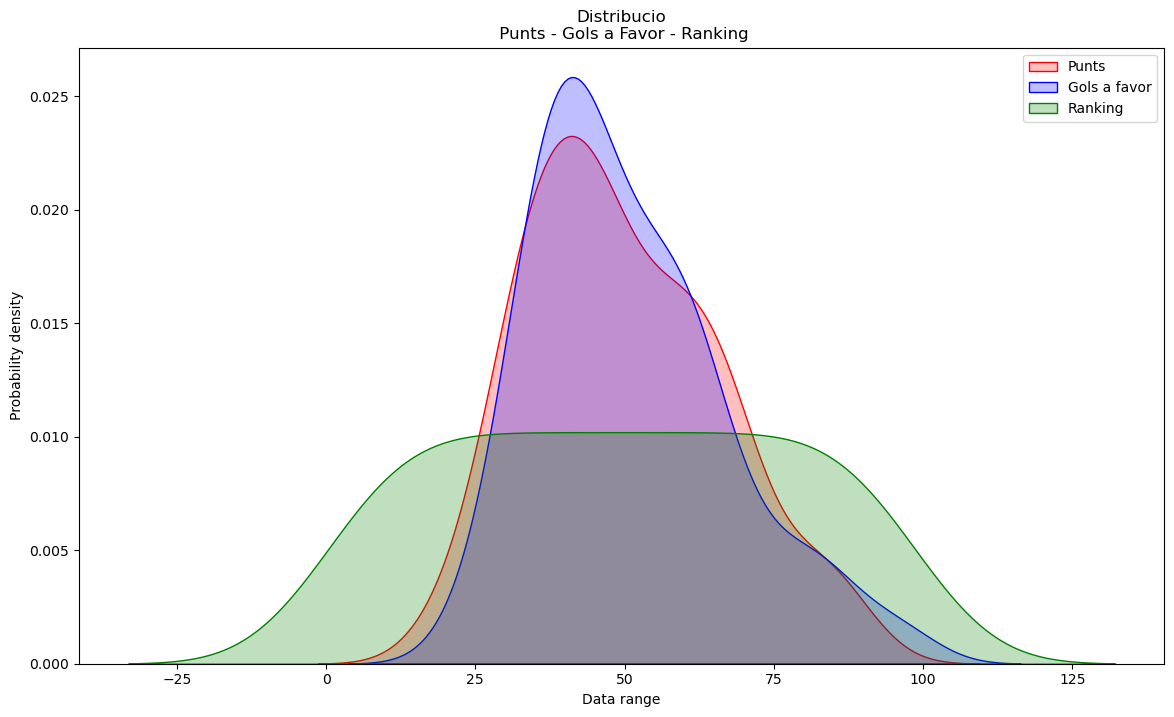

In [13]:
from scipy.stats import friedmanchisquare
data1 = df['Pts']
data2 = df['GF']
data3 = df['Rk']
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

# afegim gràfiques superposades
plt.figure(figsize= (14,8))
sns.kdeplot(df['Pts'], label= 'Punts', color= 'r', fill = True)
sns.kdeplot(df['GF'], label= 'Gols a favor', color= 'b', fill = True)
sns.kdeplot(df['Rk'], label= 'Ranking', color= 'g', fill = True)

plt.title('Distribucio\n Punts - Gols a Favor - Ranking', fontsize=12)
plt.ylabel('Probability density',fontsize=10)
plt.xlabel('Data range',fontsize=10)
plt.legend()
plt.show()

El valor de p és 0.676, molt superior a 0.05, per la qual cosa probablement les mostres tinguin distribucions iguals, de manera que acceptem l'hipòtesi nul·la.  

A continuació mostrem un codi que crea totes les combinacions possibles de 3 variables numeriques (sense repetir), i per cada combinació utilitza el test de Friedman per discernir si les 3 variables tenen o no la mateixa distribució. També crea una llista amb les combinacions que probablement tenen la mateixa distribució i compta la resta de les combinacions, que no mostrarem ja que en són moltes.

In [14]:
# Ja tenim les columnes numeriques de l'exercici 2: df_num_columns = []

# Totes les combinacions de 3 (ho tornen com a tuples)
comb = combinations(df_num_columns, 3) 

from scipy.stats import friedmanchisquare

same_distr_list = []
count_diff_distr = 0

for i in list(comb):
    data1 = df[i[0]]
    data2 = df[i[1]]
    data3 = df[i[2]]
    stat, p = friedmanchisquare(data1, data2, data3)
    # print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('stat=%.3f, p=%.3f' % (stat, p))
        print('{}, {} and {} probably the same distribution'.format(i[0], i[1], i[2]))
        same_distr_list.append([i[0], i[1], i[2]])
    else:
        count_diff_distr += 1
#      print('{}, {} and {} probably different distributions'.format(i[0], i[1], i[2]))

stat=0.468, p=0.791
Rk, GF and GA probably the same distribution
stat=0.782, p=0.676
Rk, GF and Pts probably the same distribution
stat=2.286, p=0.319
Rk, GF and xG probably the same distribution
stat=0.388, p=0.824
Rk, GF and xGA probably the same distribution
stat=0.476, p=0.788
Rk, GA and Pts probably the same distribution
stat=1.245, p=0.537
Rk, GA and xG probably the same distribution
stat=2.031, p=0.362
Rk, GA and xGA probably the same distribution
stat=0.465, p=0.792
Rk, Pts and xG probably the same distribution
stat=0.497, p=0.780
Rk, Pts and xGA probably the same distribution
stat=0.633, p=0.729
Rk, xG and xGA probably the same distribution
stat=0.484, p=0.785
GF, GA and Pts probably the same distribution
stat=4.478, p=0.107
GF, GA and xG probably the same distribution
stat=1.954, p=0.377
GF, GA and xGA probably the same distribution
stat=3.943, p=0.139
GF, Pts and xG probably the same distribution
stat=0.565, p=0.754
GF, Pts and xGA probably the same distribution
stat=3.082, 

In [15]:
print('Hi han', count_diff_distr, 'combinacions que probablement no tenen la mateixa distribució.')
print('Per altra banda, hi han', len(same_distr_list), 'combinacions que probablement tenen la mateixa distribució, i aquestes són:\n')
for lst in same_distr_list:
    print(*lst)

Hi han 538 combinacions que probablement no tenen la mateixa distribució.
Per altra banda, hi han 22 combinacions que probablement tenen la mateixa distribució, i aquestes són:

Rk GF GA
Rk GF Pts
Rk GF xG
Rk GF xGA
Rk GA Pts
Rk GA xG
Rk GA xGA
Rk Pts xG
Rk Pts xGA
Rk xG xGA
GF GA Pts
GF GA xG
GF GA xGA
GF Pts xG
GF Pts xGA
GF xG xGA
GA Pts xG
GA Pts xGA
GA xG xGA
GD Pts/G xGD
GD xGD xGD/90
Pts xG xGA
